# Datathon

In [1]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
# Inspecting the contents of a file
df = pd.read_csv('epa_data_final.csv')

In [3]:
# Checking the first few rows of the dataframe
df.head()

,contract_transaction_unique_key,contract_award_unique_key,award_id_piid,modification_number,transaction_number,parent_award_agency_id,parent_award_agency_name,parent_award_id_piid,parent_award_modification_number,federal_action_obligation,...,highly_compensated_officer_2_amount,highly_compensated_officer_3_name,highly_compensated_officer_3_amount,highly_compensated_officer_4_name,highly_compensated_officer_4_amount,highly_compensated_officer_5_name,highly_compensated_officer_5_amount,usaspending_permalink,initial_report_date,last_modified_date
0,6800_-NONE-_68HERC19C0015_P00010_-NONE-_0,CONT_AWD_68HERC19C0015_6800_-NONE-_-NONE-,68HERC19C0015,P00010,0.0,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/award/CONT_AWD_68H...,2021-09-30,2021-09-30
1,6800_4732_EPG18H01444_P00019_GS03F0151X_0,CONT_AWD_EPG18H01444_6800_GS03F0151X_4732,EPG18H01444,P00019,0.0,4732.0,FEDERAL ACQUISITION SERVICE,GS03F0151X,PS0043,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/award/CONT_AWD_EPG...,2021-09-30,2021-09-30
2,6800_-NONE-_68HERD20C0001_P00012_-NONE-_0,CONT_AWD_68HERD20C0001_6800_-NONE-_-NONE-,68HERD20C0001,P00012,0.0,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/award/CONT_AWD_68H...,2021-09-21,2021-09-29
3,6800_4732_68HERC21F0043_P00007_47QRAA20D002D_0,CONT_AWD_68HERC21F0043_6800_47QRAA20D002D_4732,68HERC21F0043,P00007,0.0,4732.0,FEDERAL ACQUISITION SERVICE,47QRAA20D002D,PA0003,58072.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/award/CONT_AWD_68H...,2021-09-30,2021-09-30
4,6800_4732_EPG13H00561_P00025_GS03F0151X_0,CONT_AWD_EPG13H00561_6800_GS03F0151X_4732,EPG13H00561,P00025,0.0,4732.0,FEDERAL ACQUISITION SERVICE,GS03F0151X,PS0043,-59629.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/award/CONT_AWD_EPG...,2021-10-06,2021-10-19


In [4]:
# Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Columns: 297 entries, contract_transaction_unique_key to last_modified_date
dtypes: float64(41), int64(6), object(250)
memory usage: 4.4+ MB


In [5]:
# Printing all columns and its data type
for col in df.columns:
    print(col, df[col].dtype)


contract_transaction_unique_key object
contract_award_unique_key object
award_id_piid object
modification_number object
transaction_number float64
parent_award_agency_id float64
parent_award_agency_name object
parent_award_id_piid object
parent_award_modification_number object
federal_action_obligation float64
total_dollars_obligated float64
total_outlayed_amount_for_overall_award float64
base_and_exercised_options_value float64
current_total_value_of_award float64
base_and_all_options_value float64
potential_total_value_of_award float64
disaster_emergency_fund_codes_for_overall_award object
outlayed_amount_from_COVID-19_supplementals_for_overall_award float64
obligated_amount_from_COVID-19_supplementals_for_overall_award float64
outlayed_amount_from_IIJA_supplemental_for_overall_award float64
obligated_amount_from_IIJA_supplemental_for_overall_award float64
action_date object
action_date_fiscal_year int64
period_of_performance_start_date object
period_of_performance_current_end_date o

In [6]:
# Checking the number of missing values in each column
missing_values = df.isnull().sum()
pd.set_option('display.max_rows', None)
print(missing_values)


contract_transaction_unique_key                                      0
contract_award_unique_key                                            0
award_id_piid                                                        0
modification_number                                                  0
transaction_number                                                 127
parent_award_agency_id                                             762
parent_award_agency_name                                           762
parent_award_id_piid                                               762
parent_award_modification_number                                   762
federal_action_obligation                                            0
total_dollars_obligated                                              0
total_outlayed_amount_for_overall_award                            639
base_and_exercised_options_value                                   127
current_total_value_of_award                                       127
base_a

In [7]:
# Filter columns with missing values greater than or equal to 60%
total_rows = len(df)
threshold = 0.6 * total_rows  # 60% threshold
columns_with_high_missing = missing_values[missing_values >= threshold]
print(columns_with_high_missing)
print(columns_with_high_missing.count())

outlayed_amount_from_COVID-19_supplementals_for_overall_award     1905
obligated_amount_from_COVID-19_supplementals_for_overall_award    1903
outlayed_amount_from_IIJA_supplemental_for_overall_award          1863
obligated_amount_from_IIJA_supplemental_for_overall_award         1863
ordering_period_end_date                                          1805
sam_exception                                                     1932
sam_exception_description                                         1932
recipient_doing_business_as_name                                  1926
recipient_address_line_2                                          1900
idv_type_code                                                     1805
idv_type                                                          1805
multiple_or_single_award_idv_code                                 1805
multiple_or_single_award_idv                                      1805
type_of_idc_code                                                  1821
type_o

In [8]:
# Creating a function IQR to find the outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
# Function to identify outliers using IQR
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()  # Count the number of outliers

# Apply the function to each numerical column
outliers_count_per_column = numerical_columns.apply(count_outliers)

# Display columns with outliers and the number of outliers
columns_with_outliers = outliers_count_per_column[outliers_count_per_column > 0]
print("Columns with outliers and number of outliers:")
print(columns_with_outliers)

Columns with outliers and number of outliers:
federal_action_obligation                                         214
total_dollars_obligated                                           187
total_outlayed_amount_for_overall_award                           102
base_and_exercised_options_value                                  300
current_total_value_of_award                                      135
base_and_all_options_value                                        427
potential_total_value_of_award                                    161
obligated_amount_from_COVID-19_supplementals_for_overall_award      2
outlayed_amount_from_IIJA_supplemental_for_overall_award            7
obligated_amount_from_IIJA_supplemental_for_overall_award          17
recipient_zip_4_code                                               89
primary_place_of_performance_zip_4                                187
naics_code                                                        584
number_of_offers_received                   

In [9]:
# Summary Statistics for Numerical Variables:
numerical_summary = df.describe()
print(numerical_summary)

       transaction_number  parent_award_agency_id  federal_action_obligation  \
count              1805.0             1170.000000               1.932000e+03   
mean                  0.0             6140.964103               1.125333e+05   
std                   0.0             1077.947051               7.268124e+05   
min                   0.0             3600.000000              -1.757014e+07   
25%                   0.0             4732.000000               0.000000e+00   
50%                   0.0             6800.000000               1.312149e+04   
75%                   0.0             6800.000000               1.084577e+05   
max                   0.0             8000.000000               1.789427e+07   

       total_dollars_obligated  total_outlayed_amount_for_overall_award  \
count             1.932000e+03                             1.293000e+03   
mean              1.789692e+06                             8.126913e+05   
std               4.830855e+06                        

In [10]:
# Summary Statistics for Categorical Variables:
categorical_summary = df.select_dtypes(include='object').describe(include='all')
print(categorical_summary)

                  contract_transaction_unique_key  \
count                                        1932   
unique                                       1932   
top     6800_-NONE-_68HERC19C0015_P00010_-NONE-_0   
freq                                            1   

                   contract_award_unique_key award_id_piid  \
count                                   1932          1932   
unique                                   511           476   
top     CONT_AWD_EPC15010_6800_-NONE-_-NONE-      EPC15010   
freq                                      48            48   

       modification_number         parent_award_agency_name  \
count                 1932                             1170   
unique                  99                                5   
top                      0  ENVIRONMENTAL PROTECTION AGENCY   
freq                   362                              679   

       parent_award_id_piid parent_award_modification_number  \
count                  1170                

In [11]:
# Dropping all columns with more than 60% missing values
df = df.drop(columns=columns_with_high_missing.index)
df.head()

,contract_transaction_unique_key,contract_award_unique_key,award_id_piid,modification_number,transaction_number,parent_award_agency_id,parent_award_agency_name,parent_award_id_piid,parent_award_modification_number,federal_action_obligation,...,veterinary_college,dot_certified_disadvantage,self_certified_small_disadvantaged_business,small_disadvantaged_business,c8a_program_participant,historically_underutilized_business_zone_hubzone_firm,sba_certified_8a_joint_venture,usaspending_permalink,initial_report_date,last_modified_date
0,6800_-NONE-_68HERC19C0015_P00010_-NONE-_0,CONT_AWD_68HERC19C0015_6800_-NONE-_-NONE-,68HERC19C0015,P00010,0.0,NaN,NaN,NaN,NaN,0.00,...,f,f,t,f,t,f,f,https://www.usaspending.gov/award/CONT_AWD_68H...,2021-09-30,2021-09-30
1,6800_4732_EPG18H01444_P00019_GS03F0151X_0,CONT_AWD_EPG18H01444_6800_GS03F0151X_4732,EPG18H01444,P00019,0.0,4732.0,FEDERAL ACQUISITION SERVICE,GS03F0151X,PS0043,0.00,...,f,f,t,f,f,f,f,https://www.usaspending.gov/award/CONT_AWD_EPG...,2021-09-30,2021-09-30
2,6800_-NONE-_68HERD20C0001_P00012_-NONE-_0,CONT_AWD_68HERD20C0001_6800_-NONE-_-NONE-,68HERD20C0001,P00012,0.0,NaN,NaN,NaN,NaN,0.00,...,f,f,t,f,t,t,f,https://www.usaspending.gov/award/CONT_AWD_68H...,2021-09-21,2021-09-29
3,6800_4732_68HERC21F0043_P00007_47QRAA20D002D_0,CONT_AWD_68HERC21F0043_6800_47QRAA20D002D_4732,68HERC21F0043,P00007,0.0,4732.0,FEDERAL ACQUISITION SERVICE,47QRAA20D002D,PA0003,58072.00,...,f,t,t,f,f,f,f,https://www.usaspending.gov/award/CONT_AWD_68H...,2021-09-30,2021-09-30
4,6800_4732_EPG13H00561_P00025_GS03F0151X_0,CONT_AWD_EPG13H00561_6800_GS03F0151X_4732,EPG13H00561,P00025,0.0,4732.0,FEDERAL ACQUISITION SERVICE,GS03F0151X,PS0043,-59629.29,...,f,f,t,f,f,f,f,https://www.usaspending.gov/award/CONT_AWD_EPG...,2021-10-06,2021-10-19


In [12]:
# checking outliers after dropping columns with high missing values
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
# Function to identify outliers using IQR
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()  # Count the number of outliers

# Apply the function to each numerical column
outliers_count_per_column = numerical_columns.apply(count_outliers)

# Display columns with outliers and the number of outliers
columns_with_outliers = outliers_count_per_column[outliers_count_per_column > 0]
print("Columns with outliers and number of outliers:")
print(columns_with_outliers)

Columns with outliers and number of outliers:
federal_action_obligation                  214
total_dollars_obligated                    187
total_outlayed_amount_for_overall_award    102
base_and_exercised_options_value           300
current_total_value_of_award               135
base_and_all_options_value                 427
potential_total_value_of_award             161
recipient_zip_4_code                        89
primary_place_of_performance_zip_4         187
naics_code                                 584
number_of_offers_received                  130
dtype: int64


In [13]:
# Checking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Columns: 250 entries, contract_transaction_unique_key to last_modified_date
dtypes: float64(21), int64(6), object(223)
memory usage: 3.7+ MB


In [15]:
# Columns we picked based on our Business knowledge
keep_cols = [
    'contract_transaction_unique_key',
    'federal_action_obligation',
    'total_dollars_obligated',
    'base_and_exercised_options_value',
    'current_total_value_of_award',
    'base_and_all_options_value',
    'potential_total_value_of_award',
    'action_date_fiscal_year',
    'awarding_office_name',
    'funding_office_name',
    'recipient_parent_name',
    'recipient_city_name',
    'recipient_state_name',
    'primary_place_of_performance_city_name',
    'primary_place_of_performance_state_code',
    'type_of_contract_pricing',
    'product_or_service_code_description',
    'naics_description',
    'place_of_manufacture',
    'solicitation_procedures',
    'organizational_type',
    'corporate_entity_not_tax_exempt',
    'partnership_or_limited_liability_partnership',
    'sole_proprietorship',
    'educational_institution']

#drop columns
drop_cols = [col for col in df.columns if col not in keep_cols]
new_df = df.drop(columns=drop_cols)



In [16]:
# Summary Statistics for Numerical Variables:
numerical_summary = new_df.describe()
numerical_summary

,federal_action_obligation,total_dollars_obligated,base_and_exercised_options_value,current_total_value_of_award,base_and_all_options_value,potential_total_value_of_award,action_date_fiscal_year
count,1.932000e+03,1.932000e+03,1.805000e+03,1.805000e+03,1.932000e+03,1.932000e+03,1932.000000
mean,1.125333e+05,1.789692e+06,1.379645e+05,2.369866e+06,6.223375e+06,2.273125e+07,2021.024845
std,7.268124e+05,4.830855e+06,8.063773e+05,5.879147e+06,1.858228e+08,3.217555e+08,1.398899
min,-1.757014e+07,0.000000e+00,-1.757014e+07,0.000000e+00,-4.500000e+07,0.000000e+00,2019.000000
25%,0.000000e+00,8.056318e+04,0.000000e+00,1.200160e+05,0.000000e+00,1.548292e+05,2020.000000
50%,1.312149e+04,4.052019e+05,0.000000e+00,5.865488e+05,0.000000e+00,1.252274e+06,2021.000000
75%,1.084577e+05,1.494036e+06,6.900000e+04,2.109324e+06,1.625692e+04,3.731075e+06,2022.000000
max,1.789427e+07,3.443327e+07,1.789427e+07,3.909382e+07,5.776500e+09,5.776500e+09,2023.000000


In [17]:
# Summary Statistics for Categorical Variables:
categorical_summary = new_df.select_dtypes(include='object').describe(include='all')
categorical_summary

,contract_transaction_unique_key,awarding_office_name,funding_office_name,recipient_parent_name,recipient_city_name,recipient_state_name,primary_place_of_performance_city_name,primary_place_of_performance_state_code,type_of_contract_pricing,product_or_service_code_description,naics_description,place_of_manufacture,solicitation_procedures,organizational_type,corporate_entity_not_tax_exempt,partnership_or_limited_liability_partnership,sole_proprietorship,educational_institution
count,1932,1932,1932,1932,1932,1932,1805,1805,1932,1932,1932,1805,1928,1932,1932,1932,1932,1932
unique,1932,20,37,128,101,29,85,31,6,116,68,6,5,4,2,2,2,1
top,6800_-NONE-_68HERC19C0015_P00010_-NONE-_0,CINCINNATI ACQUISITION DIV (CAD),OFC RESEARCH DEV (ORD) (FUNDING),"PEGASUS TECHNICAL SERVICES, INC",ALEXANDRIA,VIRGINIA,CINCINNATI,OH,FIRM FIXED PRICE,SUPPORT- PROFESSIONAL: ENGINEERING/TECHNICAL,ENVIRONMENTAL CONSULTING SERVICES,NOT A MANUFACTURED END PRODUCT,ONLY ONE SOURCE,CORPORATE NOT TAX EXEMPT,t,f,f,f
freq,1,618,493,273,318,444,323,341,1153,226,256,1651,628,1712,1712,1820,1909,1932


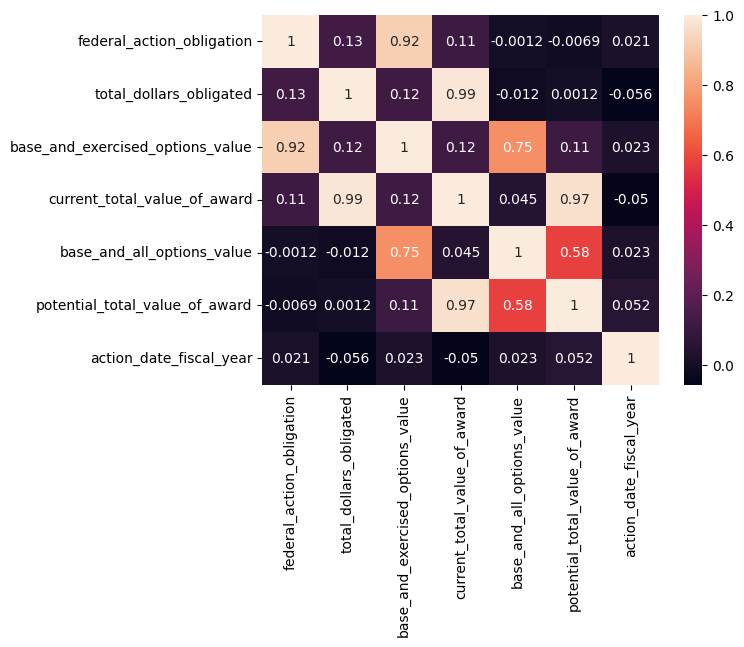

In [20]:
# Selecting only the numerical columns
numerical_columns = [
    'federal_action_obligation',
    'total_dollars_obligated',
    'base_and_exercised_options_value',
    'current_total_value_of_award',
    'base_and_all_options_value',
    'potential_total_value_of_award',
    'action_date_fiscal_year'
]

# Subsetting the DataFrame with only numerical columns
df_numerical = new_df[numerical_columns]

corr_matrix = df_numerical.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()



In [21]:
# Drop the 'current_total_value_of_award' column to avoid colinarity, since its similar to our target variable
new_df.drop(columns=['current_total_value_of_award'], inplace=True)
new_df.head()


,contract_transaction_unique_key,federal_action_obligation,total_dollars_obligated,base_and_exercised_options_value,base_and_all_options_value,potential_total_value_of_award,action_date_fiscal_year,awarding_office_name,funding_office_name,recipient_parent_name,...,type_of_contract_pricing,product_or_service_code_description,naics_description,place_of_manufacture,solicitation_procedures,organizational_type,corporate_entity_not_tax_exempt,partnership_or_limited_liability_partnership,sole_proprietorship,educational_institution
0,6800_-NONE-_68HERC19C0015_P00010_-NONE-_0,0.00,1510595.20,0.00,0.0,3445824.00,2021,CINCINNATI ACQUISITION DIV (CAD),OFC OF MISSION SUPT (OMS) (FUNDING),JYG INNOVATIONS LLC,...,FIRM FIXED PRICE,SUPPORT- ADMINISTRATIVE: MAILING/DISTRIBUTION,FACILITIES SUPPORT SERVICES,NOT A MANUFACTURED END PRODUCT,ONLY ONE SOURCE,CORPORATE NOT TAX EXEMPT,t,f,f,f
1,6800_4732_EPG18H01444_P00019_GS03F0151X_0,0.00,7600000.00,3175552.01,0.0,15904460.05,2021,INFORMATION TECHNOLOGY ACQ DIV (ITA,OFC OF MISSION SUPT (OMS) (FUNDING),"CARTRIDGE TECHNOLOGIES, LLC",...,TIME AND MATERIALS,PHOTO/MAP/PRINT/PUBLICATION- PRINT/BINDING,COMPUTER AND OFFICE MACHINE REPAIR AND MAINTEN...,NOT A MANUFACTURED END PRODUCT,SUBJECT TO MULTIPLE AWARD FAIR OPPORTUNITY,CORPORATE NOT TAX EXEMPT,t,f,f,f
2,6800_-NONE-_68HERD20C0001_P00012_-NONE-_0,0.00,1092100.00,0.00,0.0,3234038.61,2021,INFORMATION TECHNOLOGY ACQ DIV (ITA,OFC RESEARCH DEV (ORD) (FUNDING),"MPF FEDERAL, LLC",...,FIRM FIXED PRICE,SUPPORT- MANAGEMENT: OTHER,"ALL OTHER PROFESSIONAL, SCIENTIFIC, AND TECHNI...",NOT A MANUFACTURED END PRODUCT,ONLY ONE SOURCE,CORPORATE NOT TAX EXEMPT,t,f,f,f
3,6800_4732_68HERC21F0043_P00007_47QRAA20D002D_0,58072.00,654072.00,0.00,0.0,3117990.61,2021,CINCINNATI ACQUISITION DIV (CAD),OFC CHEMSFTYPOLLPREV(OCSPP) (FUND),AVANTI CORPORATION,...,TIME AND MATERIALS,OTHER ENVIRONMENTAL SERVICES,ENVIRONMENTAL CONSULTING SERVICES,NOT A MANUFACTURED END PRODUCT,SUBJECT TO MULTIPLE AWARD FAIR OPPORTUNITY,CORPORATE NOT TAX EXEMPT,t,f,f,f
4,6800_4732_EPG13H00561_P00025_GS03F0151X_0,-59629.29,7764505.43,0.00,0.0,11233010.00,2021,HEADQUARTERS ACQUISITION DIV (HQAD),OFC OF MISSION SUPT (OMS) (FUNDING),"CARTRIDGE TECHNOLOGIES, LLC",...,FIRM FIXED PRICE,MAINT/REPAIR/REBUILD OF EQUIPMENT- OFFICE MACH...,COMPUTER AND OFFICE MACHINE REPAIR AND MAINTEN...,NOT A MANUFACTURED END PRODUCT,SUBJECT TO MULTIPLE AWARD FAIR OPPORTUNITY,CORPORATE NOT TAX EXEMPT,t,f,f,f


In [22]:
# Summary Statistics for Categorical Variables:
categorical_summary = new_df.select_dtypes(include='object').describe(include='all')
print(categorical_summary)

                  contract_transaction_unique_key  \
count                                        1932   
unique                                       1932   
top     6800_-NONE-_68HERC19C0015_P00010_-NONE-_0   
freq                                            1   

                    awarding_office_name                funding_office_name  \
count                               1932                               1932   
unique                                20                                 37   
top     CINCINNATI ACQUISITION DIV (CAD)  OFC RESEARCH  DEV (ORD) (FUNDING)   
freq                                 618                                493   

                  recipient_parent_name recipient_city_name  \
count                              1932                1932   
unique                              128                 101   
top     PEGASUS TECHNICAL SERVICES, INC          ALEXANDRIA   
freq                                273                 318   

       recipient_state

In [23]:
# Checking the number of missing values in each column
missing_values = new_df.isnull().sum()
pd.set_option('display.max_rows', None)
print(missing_values)


contract_transaction_unique_key                   0
federal_action_obligation                         0
total_dollars_obligated                           0
base_and_exercised_options_value                127
base_and_all_options_value                        0
potential_total_value_of_award                    0
action_date_fiscal_year                           0
awarding_office_name                              0
funding_office_name                               0
recipient_parent_name                             0
recipient_city_name                               0
recipient_state_name                              0
primary_place_of_performance_city_name          127
primary_place_of_performance_state_code         127
type_of_contract_pricing                          0
product_or_service_code_description               0
naics_description                                 0
place_of_manufacture                            127
solicitation_procedures                           4
organization

In [24]:


# Calculate the mean of the column
column_mean = new_df['base_and_exercised_options_value'].mean()

# Impute missing values in the column with the mean
new_df['base_and_exercised_options_value'] = new_df['base_and_exercised_options_value'].fillna(column_mean)

# Drop rows with missing values
cleaned_df = new_df.dropna()

# Display the cleaned DataFrame
print(cleaned_df.head())


                  contract_transaction_unique_key  federal_action_obligation  \
0       6800_-NONE-_68HERC19C0015_P00010_-NONE-_0                       0.00   
1       6800_4732_EPG18H01444_P00019_GS03F0151X_0                       0.00   
2       6800_-NONE-_68HERD20C0001_P00012_-NONE-_0                       0.00   
3  6800_4732_68HERC21F0043_P00007_47QRAA20D002D_0                   58072.00   
4       6800_4732_EPG13H00561_P00025_GS03F0151X_0                  -59629.29   

   total_dollars_obligated  base_and_exercised_options_value  \
0               1510595.20                              0.00   
1               7600000.00                        3175552.01   
2               1092100.00                              0.00   
3                654072.00                              0.00   
4               7764505.43                              0.00   

   base_and_all_options_value  potential_total_value_of_award  \
0                         0.0                      3445824.00   
1   

In [25]:
# Checking the number of missing values in each column
missing_values = cleaned_df.isnull().sum()
pd.set_option('display.max_rows', None)
cleaned_df.drop(columns=['contract_transaction_unique_key'], inplace=True)
print(missing_values)


contract_transaction_unique_key                 0
federal_action_obligation                       0
total_dollars_obligated                         0
base_and_exercised_options_value                0
base_and_all_options_value                      0
potential_total_value_of_award                  0
action_date_fiscal_year                         0
awarding_office_name                            0
funding_office_name                             0
recipient_parent_name                           0
recipient_city_name                             0
recipient_state_name                            0
primary_place_of_performance_city_name          0
primary_place_of_performance_state_code         0
type_of_contract_pricing                        0
product_or_service_code_description             0
naics_description                               0
place_of_manufacture                            0
solicitation_procedures                         0
organizational_type                             0


<ipython-input-25-199d4f54d56e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(columns=['contract_transaction_unique_key'], inplace=True)


In [26]:
cleaned_df.head()

,federal_action_obligation,total_dollars_obligated,base_and_exercised_options_value,base_and_all_options_value,potential_total_value_of_award,action_date_fiscal_year,awarding_office_name,funding_office_name,recipient_parent_name,recipient_city_name,...,type_of_contract_pricing,product_or_service_code_description,naics_description,place_of_manufacture,solicitation_procedures,organizational_type,corporate_entity_not_tax_exempt,partnership_or_limited_liability_partnership,sole_proprietorship,educational_institution
0,0.00,1510595.20,0.00,0.0,3445824.00,2021,CINCINNATI ACQUISITION DIV (CAD),OFC OF MISSION SUPT (OMS) (FUNDING),JYG INNOVATIONS LLC,DAYTON,...,FIRM FIXED PRICE,SUPPORT- ADMINISTRATIVE: MAILING/DISTRIBUTION,FACILITIES SUPPORT SERVICES,NOT A MANUFACTURED END PRODUCT,ONLY ONE SOURCE,CORPORATE NOT TAX EXEMPT,t,f,f,f
1,0.00,7600000.00,3175552.01,0.0,15904460.05,2021,INFORMATION TECHNOLOGY ACQ DIV (ITA,OFC OF MISSION SUPT (OMS) (FUNDING),"CARTRIDGE TECHNOLOGIES, LLC",ROCKVILLE,...,TIME AND MATERIALS,PHOTO/MAP/PRINT/PUBLICATION- PRINT/BINDING,COMPUTER AND OFFICE MACHINE REPAIR AND MAINTEN...,NOT A MANUFACTURED END PRODUCT,SUBJECT TO MULTIPLE AWARD FAIR OPPORTUNITY,CORPORATE NOT TAX EXEMPT,t,f,f,f
2,0.00,1092100.00,0.00,0.0,3234038.61,2021,INFORMATION TECHNOLOGY ACQ DIV (ITA,OFC RESEARCH DEV (ORD) (FUNDING),"MPF FEDERAL, LLC",GAITHERSBURG,...,FIRM FIXED PRICE,SUPPORT- MANAGEMENT: OTHER,"ALL OTHER PROFESSIONAL, SCIENTIFIC, AND TECHNI...",NOT A MANUFACTURED END PRODUCT,ONLY ONE SOURCE,CORPORATE NOT TAX EXEMPT,t,f,f,f
3,58072.00,654072.00,0.00,0.0,3117990.61,2021,CINCINNATI ACQUISITION DIV (CAD),OFC CHEMSFTYPOLLPREV(OCSPP) (FUND),AVANTI CORPORATION,ALEXANDRIA,...,TIME AND MATERIALS,OTHER ENVIRONMENTAL SERVICES,ENVIRONMENTAL CONSULTING SERVICES,NOT A MANUFACTURED END PRODUCT,SUBJECT TO MULTIPLE AWARD FAIR OPPORTUNITY,CORPORATE NOT TAX EXEMPT,t,f,f,f
4,-59629.29,7764505.43,0.00,0.0,11233010.00,2021,HEADQUARTERS ACQUISITION DIV (HQAD),OFC OF MISSION SUPT (OMS) (FUNDING),"CARTRIDGE TECHNOLOGIES, LLC",ROCKVILLE,...,FIRM FIXED PRICE,MAINT/REPAIR/REBUILD OF EQUIPMENT- OFFICE MACH...,COMPUTER AND OFFICE MACHINE REPAIR AND MAINTEN...,NOT A MANUFACTURED END PRODUCT,SUBJECT TO MULTIPLE AWARD FAIR OPPORTUNITY,CORPORATE NOT TAX EXEMPT,t,f,f,f


In [27]:
# Saving the data as csv
cleaned_df.to_csv('epa_cleaned_final.csv', index=False)


In [28]:
# Filter categorical columns by data type
categorical_columns = cleaned_df.select_dtypes(include=['object']).columns

# Apply one-hot encoding
encoded_df = pd.get_dummies(cleaned_df, columns=categorical_columns)

# Display the encoded DataFrame
print(encoded_df.head())


   federal_action_obligation  total_dollars_obligated  \
0                       0.00               1510595.20   
1                       0.00               7600000.00   
2                       0.00               1092100.00   
3                   58072.00                654072.00   
4                  -59629.29               7764505.43   

   base_and_exercised_options_value  base_and_all_options_value  \
0                              0.00                         0.0   
1                        3175552.01                         0.0   
2                              0.00                         0.0   
3                              0.00                         0.0   
4                              0.00                         0.0   

   potential_total_value_of_award  action_date_fiscal_year  \
0                      3445824.00                     2021   
1                     15904460.05                     2021   
2                      3234038.61                     2021   
3     

In [29]:
# Running a Linear Regression to predict pontential_total_value_award
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = encoded_df.drop(columns=['potential_total_value_of_award'])
y = encoded_df['potential_total_value_of_award']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the linear regression model
linear_reg = LinearRegression()

# Fit the model on the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_reg.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("R-squared:", r_squared)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared: 0.9777809280190053
Mean Squared Error (MSE): 1353167598943.2764
Root Mean Squared Error (RMSE): 1163257.3227550627


In [30]:
# Finding the p values to eliminate columns that might affect our model
import statsmodels.api as sm

# Add constant term for intercept
X_train = sm.add_constant(X_train)

# Fit the linear regression model
linear_reg = sm.OLS(y_train, X_train).fit()

# Print summary including p-values
print(linear_reg.summary())


                                  OLS Regression Results                                  
Dep. Variable:     potential_total_value_of_award   R-squared:                       0.998
Model:                                        OLS   Adj. R-squared:                  0.997
Method:                             Least Squares   F-statistic:                     1371.
Date:                            Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                                    20:08:50   Log-Likelihood:                -18123.
No. Observations:                            1263   AIC:                         3.682e+04
Df Residuals:                                 976   BIC:                         3.830e+04
Df Model:                                     286                                         
Covariance Type:                        nonrobust                                         
                                                                                          

In [31]:
# Creating a function to establish a p-value threshold
from sklearn.feature_selection import f_regression

# Get p-values
p_values = f_regression(X_train, y_train)[1]

# Create a list to store the columns to keep
columns_to_keep = ['potential_total_value_of_award']  # Initialize with 'potential_total_value_of_award'

# Loop through each column and its corresponding p-value
for i, p_value in enumerate(p_values):
    # If the p-value is less than or equal to 0.05 and it's not the target variable column, keep the column
    if p_value <= 0.1 and X_train.columns[i] != 'potential_total_value_of_award':
        columns_to_keep.append(X_train.columns[i])

# Showing how many columns we have now
print(len(columns_to_keep))



95


In [32]:
# Subset the dataset based on the selected columns
selected_columns_df = encoded_df[columns_to_keep]

# Print the head of the resulting DataFrame
selected_columns_df.columns


Index(['potential_total_value_of_award', 'federal_action_obligation',
       'total_dollars_obligated', 'base_and_exercised_options_value',
       'base_and_all_options_value', 'action_date_fiscal_year',
       'awarding_office_name_CINCINNATI ACQUISITION DIV (CAD)',
       'awarding_office_name_CINCINNATI PROC OPS DIVISION (CPOD)',
       'awarding_office_name_ORD SIMPLIFIED ACQ BRANCH (SAB)',
       'awarding_office_name_REGION 2 CONTRACTING OFFICE',
       'awarding_office_name_REGION 3 CONTRACTING OFFICE',
       'awarding_office_name_REGION 4 CONTRACTING OFFICE',
       'funding_office_name_OFC RESEARCH  DEV (ORD) (FUNDING)',
       'funding_office_name_OFC RESEARCH&DEV (ORD) (FUNDING)',
       'funding_office_name_OFFICE FOR WATER (OW) (FUNDING)',
       'funding_office_name_REGION 3 (FUNDING OFFICE)',
       'funding_office_name_REGION 4 (FUNDING OFFICE)',
       'recipient_parent_name_AABS JV, L.L.C.',
       'recipient_parent_name_ACCURA ENGINEERING AND CONSULTING SERVICES, IN

In [33]:
# New Model with selected columns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = selected_columns_df.drop(columns=['potential_total_value_of_award'])
y = selected_columns_df['potential_total_value_of_award']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
linear_reg = LinearRegression()

# Fit the model on the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_reg.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("R-squared:", r_squared)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared: 0.9729364962068915
Mean Squared Error (MSE): 867275740909.1031
Root Mean Squared Error (RMSE): 931276.4041406306
